In [110]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import time

t1 = time.time()
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
t2 = time.time()
print('Loading time', t2-t1)

print(X.shape)  # object with shape 70000 * 784 pixel
print(y.shape)  # answer of x

Loading time 17.735206842422485
(70000, 784)
(70000,)


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.14, random_state=21)

X_train = X_train/255  # reformat colour value from 1-255 to be only 0-1 
X_test = X_test/255  # reformat colour value from 1-255 to be only 0-1 

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

X_train = X_train.T  # transpose x so it be (784, 60199)
X_test = X_test.T  # transpose x so it be (784, 60199)

X_train.shape


(784, 60199)

In [171]:
def init_param():
    # rand will random number between 0 to 1 
    w1 = np.random.rand(10, 784).reshape(10, 784) -0.5
    b1 = np.random.rand(10, 1).reshape(10, 1) - 0.5
    w2 = np.random.rand(10, 10).reshape(10, 10) - 0.5
    b2 = np.random.rand(10, 1).reshape(10, 1) - 0.5
    return w1, b1, w2, b2

def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m*dZ2.dot(A1.T)
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_RelU(Z1)
    dW1 = 1/m*dZ1.dot(X.T)
    db1 = 1/m*np.sum(dZ1)
    return dW1, db1, dW2, db2


def derivative_RelU(Z):
    return Z > 0

def ReLu(Z):
    # function that change x to 0 if x is less than 0 
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2


# init_param()

In [172]:
def get_predict(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_param()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:  # every 10 iter
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predict(a2), Y)}")

    return w1, b1, w2, b2

In [173]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 600, 0.25)

Iteration: 0
Accuracy: 0.15835811226100102
Iteration: 10
Accuracy: 0.39156796624528645
Iteration: 20
Accuracy: 0.5526503762520972
Iteration: 30
Accuracy: 0.6398279041180086
Iteration: 40
Accuracy: 0.688051296533165
Iteration: 50
Accuracy: 0.6559245170185551
Iteration: 60
Accuracy: 0.6918387348627053
Iteration: 70
Accuracy: 0.7253941095367032
Iteration: 80
Accuracy: 0.7442648548979219
Iteration: 90
Accuracy: 0.7618897323875812
Iteration: 100
Accuracy: 0.7775876675692287
Iteration: 110
Accuracy: 0.790361966145617
Iteration: 120
Accuracy: 0.8018737852788252
Iteration: 130
Accuracy: 0.8113091579594346
Iteration: 140
Accuracy: 0.8190999850495856
Iteration: 150
Accuracy: 0.8264755228492168
Iteration: 160
Accuracy: 0.8325387464908055
Iteration: 170
Accuracy: 0.836708250967624
Iteration: 180
Accuracy: 0.8383694081297032
Iteration: 190
Accuracy: 0.8410937058755129
Iteration: 200
Accuracy: 0.8497981694048073
Iteration: 210
Accuracy: 0.8542666821708002
Iteration: 220
Accuracy: 0.8569743683449891


In [174]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predict(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [6]
Label:  6


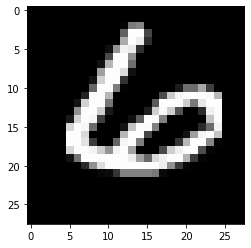

Prediction:  [6]
Label:  6


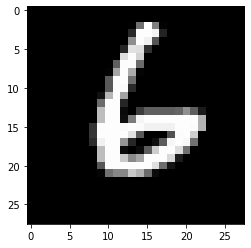

Prediction:  [3]
Label:  3


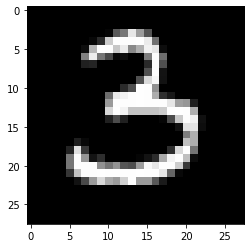

Prediction:  [9]
Label:  9


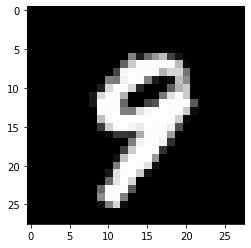

In [175]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [178]:

dev_predictions = make_predictions(X_test, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_test)

0.8992959902050811